# 基础数据分析(剔除建模、预测)


## 概念
数据分析是指用适当的方法与工具，对收集来的大量数据进行分析，提取其中有意义的信息，从而形成有价值的结论的过程。

## 流程

在进行数据分析之前，我们需要清楚数据分析的基本流程。

* 明确需求与目的
* 数据收集
    + 内部数据
    + 购买数据
    + 爬取数据
    + 调查问卷
* 数据预处理
    + 数据清洗
        - 缺失值
        - 异常值
        - 重复值
    + 数据转换
* 数据分析
    + 数据建模
    + 数据可视化
* 编写报告


## 理解流程
我们可以进行一个类比，比如，我们现在要做出一道菜肴，那我们需要进行怎样的流程呢？
* 确定做菜
* 买菜
* 洗菜
* 切菜
* 炒菜
* 盛菜
* 写日记

接下来，我们就可以将做菜的流程步骤去对应理解数据分析的步骤。

做菜步骤 | 数据分析步骤  
-|-
确定做菜 | 明确需求与目的
买菜 | 数据收集
洗菜 | 数据清洗
切菜 | 数据转换
炒菜 | 数据分析
盛菜 | 数据可视化
写日记 | 编写报告



# 数据科学分析(包括建模、预测)

## 基本流程

Data Science Solutions book 这本书为类似 Kaggle 网站上解决数据科学竞赛问题，提供了一个典型的分析流程：

- 定义问题
- 获取训练数据以及测试数据
- 加工、准备以及清洗数据
- 分析、识别数据的模式，并对数据做可视化
- 建模、预测，并解决问题
- 对结果做可视化，生成报告，并且展示问题的解决步骤和最终的解决方案
- 提交结果

现实情况下，不会严格遵循以上流程：

- 可能会结合多个步骤。例如，在分析过程中就开始用可视化
- 提前执行某个步骤。例如,数据加工前后都会对数据进行分析
- 多次执行某个步骤。例如，多次对数据进行可视化
- 完全弃用一个步骤。例如在非竞赛场合可能并不需要做提交结果的步骤

## 流程目标

主要有7个目标：

- **分类**：可能要对我们的样本进行分类。我们可能也希望了解不同类和我们的目标之间的关联。
- **相互性**：我们可以根据训练集里可用的特征来解决一个问题。那到底在数据集里的哪些特征会对解决问题起着至关重要的作用呢？从统计学上来说，是否在某个特征与问题的解之间存在某种联系？如果这个特征的值改变后，相应问题的解是否也会改变呢？反过来的情况是否也是如此呢？这个可以通过对数据集里的数值型以及离散型的特征做测试来得到。我们可能也希望得到特征之间的关系，而不是直接得到特征与问题解之间的关系。找到一些特定属性之间的关联性可能会在创建、补全以及修正特征上起到一定作用
- **转换**：对于建模阶段，我们需要去对数据进行预处理。根据模型的算法，可能需要将特征值全部转化为数字值。例如把文本特征值转化为数字值。
- **填缺**：数据的准备工作中可能也需要我们去估计一些特征的缺失值，当没有缺失值时，模型算法可能效果最好。
- **修正**：我们也可以去分析数据集中的错误以及可能存在的异常特征值，从而去修正这些包含错误值的样本。一种方法是检测样本或特征中的异常值。如果一个特征不适合分析，或者会严重影响结果，我们也可以完全舍弃掉它。
- **创造**：我们可以根据已存在的特征或者特征序列来创建新的特征，使得新特征符合相关性、转换以及完整性目标
- **制图**：如何根据原数据集以及要解决问题，对数据做合适的可视化图 

## 定义问题

“在训练数据中，提供了在泰坦尼克号上乘客的具体数据以及他们是否在那次灾难中存活的信息。参赛者能否通过已有的训练数据训练出一个模型，此模型需要根据输入的测试数据里乘客信息，来预测此乘客是否能在灾难中存活”

我们可能也想要通过问题描述获取更多有关此问题的信息。在此问题的描述中，比较有意义的描述如下：
    - 泰坦尼克号在1912年4月15日与冰山碰撞后沉没。在一共2224名乘客与船员里，有1502人不幸逝世。这个信息即表明了此次事件中生还率为32%。
    - 一个使得在这次灾难中有如此之大死亡率的原因是：在船上没有足够的救生船提供给乘客以及船员
    - 尽管在此次灾难中生还存在运气的成分，但是仍旧会有些群体的生还率高于其他人，如女人、小孩，以及上等仓的人

## 导入相关库

导入需要的库，同时，进行一些初始化的设置。

In [1]:
import numpy as np  # 科学计算工具包
import pandas as pd  # 数据分析工具包
import matplotlib.pyplot as plt # 图表绘制工具包
import seaborn as sns # 基于 matplot, 导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，这会提高图表的可读性和美观性

# 算法库
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# 在 jupyter notebook 里面显示图表
%matplotlib inline 

sns.set()

## 获取数据集
 

In [2]:
# 读取参数指定的文件，返回一个DataFrame类型的对象。  
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

## 通过描述数据来分析

* 带着以下几个问题去了解数据

    + 数据集中有哪些特征？(观察出数据中的二分类、多分类、连续数值、离散的数值，文本)
    + 哪些特征是分类型的？
    + 哪些特征是数值型的？
    + 哪些特征是混合型的？
    + 哪些特征可能有拼写、打字错误？
    + 哪些特征包含空值？
    + 这些特征的数据类型？


* 这些问题可以通过以下的属性和方法获取到

    + 属性
        + columns.value 所有数据集的列名(特征),numpy.ndarray 类型
    + 方法
        + head()  预览数据集前5行
        + tail()  预览数据集后5行
        + info()  显示大致数据信息，包括每列名称，非空值数量，每列的数据类型，内存占用等信息。
        + describe() 展示数据的一些描述性统计信息,但会过滤掉缺失值。默认只统计数值类型的字段内容。
            - describe(include=‘ALL‘),统计所有类型的数据
            - describe(include=[np.number]) 只统计数值类型的字段内容：count计数，mean平均数，std方差，min最小值，四分位数，max 最大值
            - describe(include=[np.object]) 只统计object类型的字段内容
            - describe(include=‘O’) 只统计字符串类型的字段内容：count计数，unique唯一值数量，top出现频率最高的内容，freq最高出现频率
            - describe(percentiles=[]):设置输出的百分位数，默认为[.25，.5，.75]，返回第25，第50和第75百分位数。

In [3]:
print(data_train.head()) # 预览数据集中前5行
print('_'*40)
print(data_train.columns.values)  # 罗列出数据集中的所有特征

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
__

* 数据集中有哪些特征？
    + PassengerId => 乘客ID
    + Survived => 是否存活(0 = 死亡, 1 = 存活)
    + Pclass => 舱位等级(1/2/3等舱位)
    + Name => 乘客姓名
    + Sex => 性别
    + Age => 年龄
    + SibSp => 兄弟姐妹/配偶人数
    + Parch => 父母/子女人数
    + Ticket => 船号
    + Fare => 票价
    + Cabin => 客舱
    + Embarked => 登船港口(C = Cherbourg, Q = Queenstown, S = Southampton)
* 哪些特征是分类型的？(这些值可以将样本分类为类似的样本集)
    + 分类型：Survived,Sex,Embarked
    + 序列型: Pclass
* 哪些特征是数值型的？(这些值在不同的样本中会发生变化)
    + 连续的：PassengerId，Age，Fare 
    + 离散的：SibSp,Parch (同在船上的兄弟姐妹/配偶数量、同在船上的父母/孩子数量)
* 哪些特征是混合型的？(同一特征中含有数字、字母。需要修正)
    + Ticket,Cabin    
* 哪些特征可能有拼写或打字错误？(需要修正)
    + Name (乘客姓名可能包含着一些错误或拼写错误，因为有多种方式用于描述名称，包括标题、圆括号和用于替代名称或短名称的引号。)
    
    
------

**知识点**
* **类别数据(定性数据)**

    数据被划分为各种类别，用以描述某类得性质或特征。因此，类别数据也称为定性数据。游戏种类就是定性数据的一个实例 —— 每种游戏种类形成一个独立的类别。关于定性数据，请记住一个重点：不能将数据值理解为数字。
    

* **数值型数据(定量数据)**

    数值型数据不同，它所涉及的是数字。数值型数据中的数值具有数字的意义，但还涉及计量或计数。由于数值型数据描述的是数量，所以也称为定量数据。

------

In [9]:
# 显示大致数据信息，包括每列名称，非空值数量，每列的数据类型，内存占用
data_train.info()
print('_'*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

* 哪些特征包含空值？(需要更正)
    + 训练数据中含有空值的特征：Cabin > Age > Embarked (缺少的数量从大到小排序)
    + 测试数据中含有空值的特征：Cabin > Age (缺少的数量从大到小排序)
* 这些特征的数据类型？(用于数据转换阶段)
     + 训练数据：7个特征是整数或浮点数，5个特征是字符串
     + 测试数据：6个特征是整数或浮点数，5个特征是字符串

In [10]:
# describe() include 参数的区别
print(data_train.describe()) # 默认，只统计数值型的字段内容
print('_'*40)
print(data_train.describe(include=[np.number])) #  只统计数值型的字段内容
print('_'*40)
print(data_train.describe(include=[np.object])) #  只统计object类型的字段内容
print('_'*40)
print(data_train.describe(include='O')) #  只统计字符串的字段内容
print('_'*40)
print(data_train.describe(include='all'))#  统计所有字段内容

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
________________________________________
       PassengerId    Survived      Pcla

In [11]:
# describe() 返回数据数值情况，数值数据的字段内容：count计数，mean平均数，std方差，min最小值，四分位数，max 最大值 
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 样本中数值型特征的分布情况？(这帮助我们判断实际问题域的训练数据集的代表性如何。)
    - PassengerId 的 count 计数得出 891
        + 样本大小891
    - Survied 的均值为 0.383838，而 survied 值只有0或1，说明这个均值反应了存活率。因此看看第61、62百分位数来验证一下。发现第61百分位为0，第62百分位为1，这条(有和没有分割线)印证了38%的存活率。
        + 是否存活是一个值为0或者1的绝对变量 
        + 样本存活率约38%，实际存活率为32%
    - Parch (有和没有分割线)在第75百分位和第100百分位为之间，试着缩小0和1之间范围。用二分查找方式试试第56、59、63、66、69百分位数，继续试直到找到(有和没有分割线)，来验证一下，找到分割线位于68和69百分位数之间。 
        + 大多数乘客（>75%）没有与父母/孩子一起同行
    - SibSp 的第50百分位为0，第75百分位为1，为了确定分割线，试着缩小0和1之间范围。用二分查找方式试试第76、81、87、93、99百分位数，继续试直到找到(有和没有分割线)，来验证一下，找到分割线位于76和77百分位数之间。        
        + 大约24%的乘客有与亲属/配偶一起登船
    - 因为年龄和票价没有很明显的(有和没有分割线)，因此直接查看第10、20、30、40、50 直到99的百分位数。
        + 票价差异显著，只有少数乘客(<1%)支付高达512元的票价
        + 65-80岁的乘客(<1%)较少

In [12]:
#通过使用 percentiles=[.61, .62] 来查看数据集可以了解到生存率为 38%
data_train.describe(percentiles=[.61,.62])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 通过使用 percentile=[.67,.68, .69] 来查看SibSp的分布  
data_train.describe(percentiles=[.67,.68,.69])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
67%,597.300000,1.000000,3.000000,34.355000,0.000000,0.000000,26.250000
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
69%,615.100000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# 通过使用 percentiles=[.75,.76,.77] 来查看Parch的分布
data_train.describe(percentiles=[.75,.76,.77])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
76%,677.400000,1.000000,3.000000,39.000000,1.000000,0.000000,31.387500
77%,686.300000,1.000000,3.000000,39.000000,1.000000,1.000000,33.656240
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# 通过使用 percentile=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99] 来查看Age和Fare的分布
data_train.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


* 样本中分类型特征的分布情况如何？
    - Name 的 count=unique=891
        + 乘客姓名在整个数据集中是唯一的
    - Unique = 2,Top=男性(性别中出现频率最高的)，Freq=577(其出现的频率）,P(Male)=577/891=65%
        + 性别变量有两个值，65%为男性。
    - Cabin 的 Count与Unique并不相等
        + 有些乘客共用一个Cabin
    - Unique = 3，Top = S
        + Embarked 有三种值：C = Cherbourg, Q = Queenstown, S = Southampton。大多数乘客使用的S港
    - Unique = 681, Count=891,P(Duplicate)=891-681/891=23%
        + 票号的重复比例很高（23%）

In [16]:
data_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ford, Mrs. Edward (Margaret Ann Watson)",male,1601,G6,S
freq,1,577,7,4,644


### 基于数据分析的假设（对应开头的目标）

我们根据迄今为止的数据分析做出以下假设。在采取适当的行动之前，我们可以进一步验证这些假设。

#### 相关性：

1. 想知道每个特征与存活率之间的关系。在项目早期就这样做，然后在后期将这些相关性与模型关联快速匹配。(相关性#1)

#### 填缺：

1. 我们可能会去补全 Age 特征下的数据，因为它一定与存活率相关的 (填缺#1)
2. 我们可能会去补全 Embarked 特征下的数据，因为它可能与存活率或者其他重要的特征存在相关性 (填缺#2)
 
#### 修正：

1. Ticket 特征可能需要从我们的分析中丢弃，因为它的数值重复率高达22%，并且 Ticket 与 survival 之间很可能并没有联系 (修正#1)
2. Cabin 特征可能也需要丢弃，因为它的数值非常不完整，并且在训练集以及测试集里均包含较多的 null 值 (修正#2)
3. PassengerId 特征可能也需要被丢弃，因为它对 survival 没任何作用 (修正#3)
4. Name 特征相对来说不是特别规范，并且很有可能与 survival 之间没有直接联系，所以可能也应该被丢弃(修正#4)

#### 创造：

1. 我们可以根据 Parch 和 SibSp 的特征来创建一个新的 Family 特征，以此得到每个乘客有多少家庭成员登了船 (创建#1)
2. 我们可以对 Name 特征做进一步加工，提取出名字里的 Title 作为一个新的特征 (创建#2)
3. 我们可以为 Age 特征创建一个新的特征:年龄段，将它原本的连续型数值特征转换为有序的离散型特征 (创建#3)
4. 我们也可以创建一个票价（Fare）范围的特征，如果它对我们的分析有帮助的话 (创建#4)
 

#### 分类：

* 根据之前的问题描述或者已有的数据，我们也可以提出以下假设：

1. 女人（Sex=female）更有可能存活 (分类假设#1)
2. 孩子（Age<?）也更有可能存活 (分类假设#2)
3. 上等仓的乘客（Pclass=1）有更大的存活率 (分类假设#3)
    
    
## 通过旋转特征快速地对特征间的相关性分析

为了验证之前的观察和假设，我们可以快速地分析特征间的相关性。这种方法仅针对那些没有空值的特征，并且仅仅对那些分类型的（Sex）、有序型的（Pclass）以及离散型（SibSp，Parch）的特征才有意义。【因为需要分组】

------- 按照 Pclass 特征分组，并计算其相应的存活率,查看两者间的相关性 -------
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


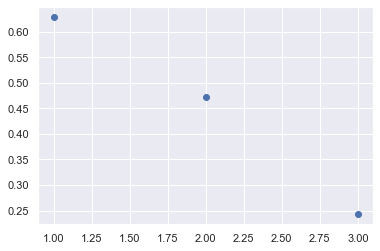

------- 按照 SibSp 特征分组，并计算其相应的存活率,查看两者间的相关性 -------
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


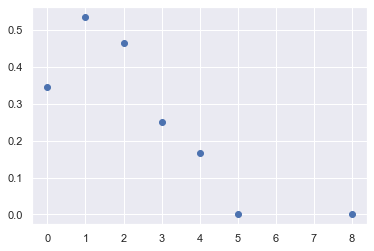

------- 按照 Parch 特征分组，并计算其相应的存活率,查看两者间的相关性 -------
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


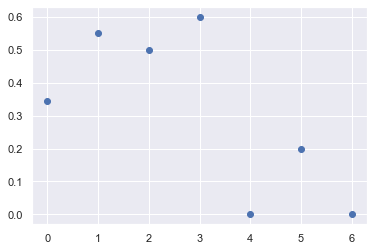

In [17]:
# 按照不同特征分组，并计算其相应的存活率
# 取存活率和每个特征，然后按照另一特征分组，求均值之后排序。as_index=False 表示原来的数据索引不变。ascending=False 降序排序。
# 散点图是确定变量之间是否存在相关关系及关系紧密程度的简单而又直观的方法。如果所有散点分布呈椭圆状，则说明二变量之间呈线性关系。如果散点图呈现圆形，就为零相关或弱相关

cor_list = ['Pclass','SibSp','Parch']
for i in cor_list:
    print('-'*7,'按照 {} 特征分组，并计算其相应的存活率,查看两者间的相关性'.format(i),'-'*7)
    cor_relation = data_train[[i,'Survived']].groupby([i],as_index=False).mean().sort_values(by='Survived',ascending=False)
    print(cor_relation)
    plt.scatter(x=cor_relation[i] , y=cor_relation['Survived'])
    plt.show()

------- 按照 Sex 特征分组,并计算其相应的存活率,查看两者间的关系 -------
      Sex  Survived
0  female  0.742038
1    male  0.188908


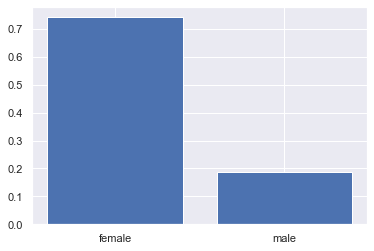

In [18]:
# 由于性别特征（Sex）只有两种值，这里用柱状图来查看

print('-'*7,'按照 {} 特征分组,并计算其相应的存活率,查看两者间的关系'.format('Sex'),'-'*7)
cor_relation = data_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)
print(cor_relation)
plt.bar(cor_relation['Sex'],cor_relation['Survived'])
plt.show()

观察以上数据可以得出：
- Pclass 特征我们观察到Pclass=1和存活率之间存在显著的相关性（>0.5）。我们决定在模型中包含这个特征。 (分类假设#3)
- SibSp 和 Parch 这些特征对于某些值来说没有相关性，最好从这些单独的特征中派生出一个或一组特征。(创建#1)
- Sex 特征，女性存活率高达为74%，且比男性存活率高出56%。 (分类假设#2)


## 可视化数据分析

现在我们可以继续通过可视化数据分析来确认我们的假设。

### 数值型特征与目标(存活)之间的联系：

让我们先从理解数值型特征和我们的目标(存活)之间的相关性开始。

**直方图对于分析连续的数值变量（如年龄）很有用**，在这些变量中，将数值条状化有助于识别有用的模式。直方图可以通过自动定义的bins（bins 指直方图里柱的个数）和排列好的范围表示样本的分布。这帮助我们回答了一些与特定范围相关联的问题。（婴儿是否有更高的存活率？）

注意这里直方图的x轴代表了样本的数量。

FacetGrid当您想要在数据集的子集中分别可视化变量的分布或多个变量之间的关系时，该类非常有用。一个FacetGrid可以与多达三个维度可以得出：row，col，和hue。前两个与得到的轴阵列有明显的对应关系; 将色调变量视为沿深度轴的第三个维度，其中不同的级别用不同的颜色绘制。

```
FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
```

- col 列上的变量(左右)
- row 行上的变量(上下)

这里将 FacetGrid 函数用于不同存活率的值，独立分成两个直方图。

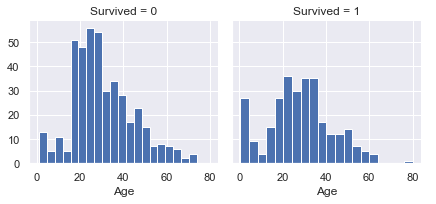

In [19]:
g = sns.FacetGrid(data_train, col="Survived",sharex=True, sharey=True)# X,Y 轴共享
g.map(plt.hist, "Age", bins=20)
g.add_legend();

* 观察
    - <=4岁的婴儿存活率较高。
    - 年龄最大的乘客(80岁)幸存。
    - 大量15-25岁的人没有活下来。
    - 大部分乘客年龄在15至35岁之间。
* 决策
    - 在我们的模型训练中，我们应该考虑年龄(分类假设#2)。
    - 完成空值的年龄特性。（填缺#1）
    - 我们应该给不同年龄的人分组。（创建#3）



### 数值型、序列型特征与目标(存活)之间的联系：：

我们可以将多个特征组合，然后通过一个简单的图来识别它们之间的关系。这种方法可以应用在数值型以及分类型（Pclass）的特征里，因为它们的值都是数值。

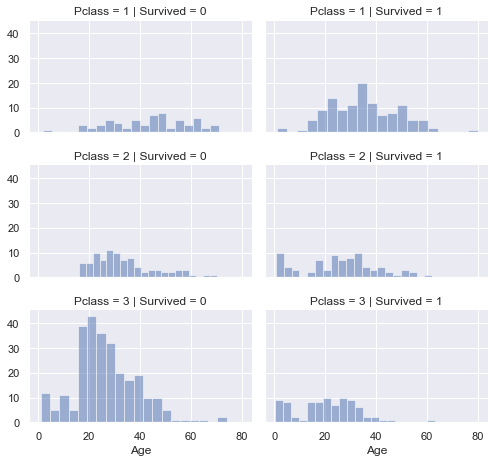

In [20]:
# aspect:每个小图表的横轴长度和纵轴的比，默认为1; height:每个小图表的高度设定，默认为3

grid = sns.FacetGrid(data_train,col='Survived',row='Pclass',aspect=1.6,height=2.2)
grid.map(plt.hist,"Age", alpha=.5,bins=20)

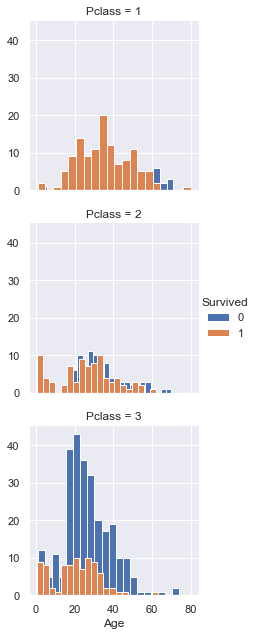

In [21]:
# 或者用这个
grid = sns.FacetGrid(data_train,hue='Survived',row='Pclass')
grid.map(plt.hist,"Age",bins=20)
grid.add_legend()

* 观察
    - 在所有舱位中，Pclass = 3 的乘客最多，但存活人数最少，大部分人都未存活 (证实分类假设#2)
    - Pclass = 1中的乘客，大部分存活下来 (证实分类假设#3)
    - Pclass = 2 和 3中，婴儿乘客大多幸存 (进一步符合分类假设#2)
    - 在乘客的年龄分布中，他们的舱位等级各有不同。
* 决策
    - 考虑在训练模型中使用 Pclass 特征。
    
### 分类型特征与目标(存活)之间的联系：

理解分类型特征和我们的目标(存活)之间的相关性开始。

---
问题
- 比较下面两段代码，为什么 hue='sex'的位置不同，导致图不一样，FacetGrid 是有 hue 这个参数的？
- 图例 Sex 的小方块颜色不显示 ？
---

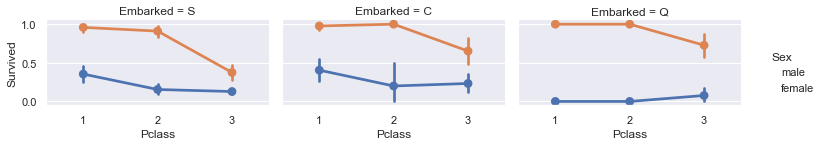

In [22]:
grid = sns.FacetGrid(data_train,col='Embarked',hue='Sex',height=2.2, aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived',order=[1,2,3]).add_legend()

/Users/xusanshan/Anaconda/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/xusanshan/Anaconda/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


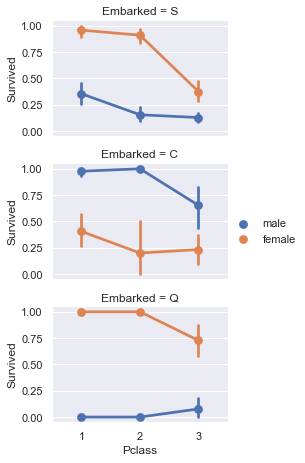

In [23]:
grid = sns.FacetGrid(data_train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

```
seaborn.pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)
```

重点参数：
- x,y:输入的绘图数据，必须是数值型数据
- hue:对输入数据进行分组的序列，使用不同颜色对各组的数据加以区分
- hue_order:在使用hue参数对数据进行分组时，可以通过该参数设置数据组的显示顺序
- order: 横坐标分组的顺序

可以看到参考教程中报的警告：
- `UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.`
- `UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.`

如果不设置 hue_order,order 参数，绘图过程中很可能造成的混乱。所以我们把参数添加上来。

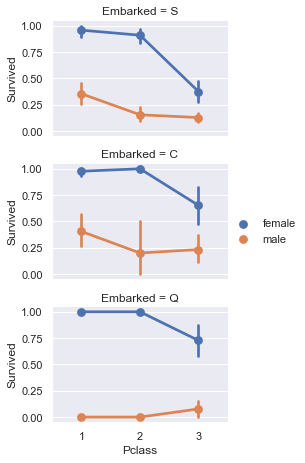

In [5]:
grid = sns.FacetGrid(data_train, row='Embarked',height=2.2, aspect=1.6) 
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex',palette='deep',hue_order=['female','male'],order=[1,2,3]) 
grid.add_legend()

没有报警告，图例也显示出来了。下图是柱状图描绘了 Embarked 和 Survived 的关系，也印证了之前的想法是对的。参考教程此处有错误。

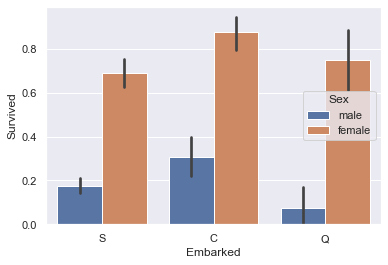

In [6]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

* 观察
    + 不论从哪个港口登船，女性乘客的存活率都高于男性。(分类假设#1)
    + 对于从S或C港口登船的男性乘客中，Pclass=1的存活率比 Pclass =2, Pclass=3 都高。(分类假设#3)
    + 对于从Q港口登船的男性乘客中，Pclass=3的存活率比 Pclass =1, Pclass=2 高。(相关性#1)


* 决策
    + 在训练模型中加入 Sex 特征。
    + 补全 Embarked 特征，并加入训练模型
  

### 分类型特征与数值型特征之间的联系：

我们可能也希望去把分类特征（包含非数值）和数值特征关联起来。我们可以考虑将 Embarked（分类、非数值），Sex（分类、非数值），Fare（连续、数值），Survived（分类、数值） 相关联起来。

原参考这里会报错，因为没有添加 order 参数

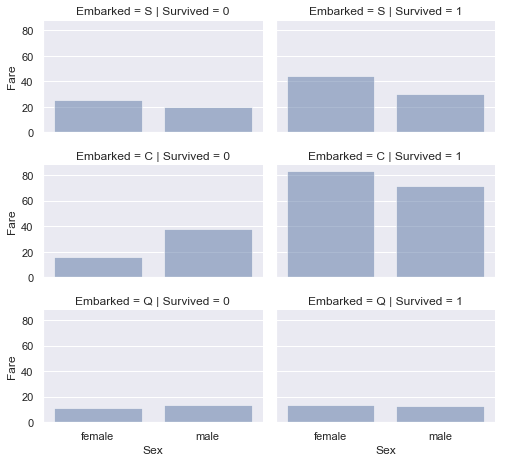

In [12]:
grid = sns.FacetGrid(data_train, row='Embarked',col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare',order=['female','male'],alpha=.5, ci=None)
grid.add_legend()

观察

-票价较高的乘客存活率较高。(符合创建#4假设）

-登船港与存活率有关。 (符合相关性#1，填缺#2假设)

决策

-在训练模型中加入票价特征。